In [1]:
import pandas as pd
import numpy as np
from numpy import ndarray
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
data_source = r".\Breast Tissue_MLR\BreastTissue.xls"
data = pd.read_excel(data_source,
                     sheet_name="Data", header=0, index_col=0)

In [4]:
data

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
104,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534


In [5]:
print("Mean values for all classes of tissue:")
data.iloc[:, 1:].mean()

Mean values for all classes of tissue:


I0         784.251618
PA500        0.120133
HFS          0.114691
DA         190.568642
Area      7335.155162
A/DA        23.473784
Max IP      75.381258
DR         166.710575
P          810.638127
dtype: float64

In [6]:
print("Mean values for Carcinoma tissue:")
data[data["Class"] == "car"].iloc[:, 1:].mean()

Mean values for Carcinoma tissue:


I0         394.232013
PA500        0.219853
HFS          0.184340
DA         168.271163
Area      5723.121373
A/DA        32.046327
Max IP      64.531520
DR         153.007986
P          479.972602
dtype: float64

In [7]:
print("Mean values for Glandular tissue:")
data[data["Class"] == "gla"].iloc[:, 1:].mean()

Mean values for Glandular tissue:


I0        238.316150
PA500       0.116948
HFS         0.095862
DA         40.351416
Area      411.663501
A/DA        7.846327
Max IP     26.350228
DR         27.501611
P         261.502774
dtype: float64

In [8]:
print("Mean values for Connective tissue:")
data[data["Class"] == "con"].iloc[:, 1:].mean()

Mean values for Connective tissue:


I0        1212.864344
PA500        0.070218
HFS          0.052235
DA         367.985832
Area      5324.571200
A/DA        13.997809
Max IP      72.957969
DR         357.982419
P         1064.992919
dtype: float64

### Średnie wartości cech w poszczególnych klasach

In [9]:
means = data.groupby(["Class"]).mean()
means.round(4)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Class,,,,,,,,,
adi,2052.0503,0.0736,0.1344,396.9972,24889.7428,50.7758,194.5973,324.7147,2138.7537
car,394.2320,0.2199,0.1843,168.2712,5723.1214,32.0463,64.5315,153.0080,479.9726
con,1212.8643,0.0702,0.0522,367.9858,5324.5712,13.9978,72.9580,357.9824,1064.9929
fad,245.8626,0.0953,0.0707,54.3911,610.1829,10.0132,22.9741,47.8447,268.8740
gla,238.3162,0.1169,0.0959,40.3514,411.6635,7.8463,26.3502,27.5016,261.5028
mas,290.3108,0.1231,0.1114,73.2973,1082.3999,12.5817,31.4714,63.6100,314.9211


### Odchylenie standardowe cech w poszczególnych klasach

In [10]:
stds = data.groupby(["Class"]).std()
stds.round(4)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Class,,,,,,,,,
adi,342.4865,0.0371,0.1150,220.6748,35695.2982,33.9328,106.5599,230.3635,386.5093
car,87.0457,0.0508,0.1133,62.8661,3172.2619,9.2804,18.5846,67.0207,93.1869
con,386.4724,0.0268,0.0463,176.1754,4069.2279,10.7724,34.4540,179.5508,356.0655
fad,69.7613,0.0529,0.0481,20.6592,430.6137,5.0248,10.9280,22.2608,74.6163
gla,119.1858,0.0344,0.0704,31.0628,632.7631,4.7101,7.1785,33.2079,121.4705
mas,111.9575,0.0522,0.1110,35.6172,1254.0518,8.4503,10.7493,39.2177,112.2945


### Stosunki sygnał/szum

In [11]:
means.div(stds)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Class,,,,,,,,,
adi,5.991624,1.981191,1.168190,1.799015,0.697284,1.496365,1.826177,1.409575,5.533511
car,4.529022,4.326409,1.627298,2.676660,1.804114,3.453135,3.472305,2.282995,5.150643
con,3.138295,2.619183,1.129022,2.088748,1.308497,1.299419,2.117544,1.993766,2.991003
fad,3.524342,1.802278,1.469851,2.632784,1.417008,1.992760,2.102318,2.149276,3.603421
gla,1.999534,3.401648,1.361094,1.299028,0.650581,1.665863,3.670720,0.828164,2.152809
mas,2.593043,2.359930,1.003201,2.057921,0.863122,1.488920,2.927767,1.621972,2.804421


### Korelacje wzajemne cech

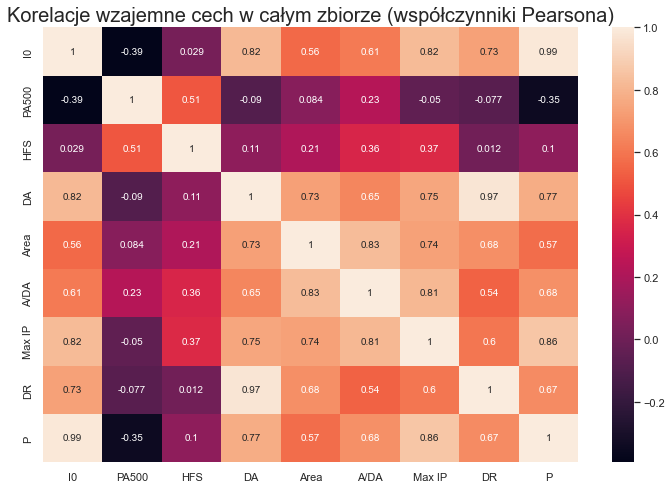

In [12]:
corrs = data.corr("pearson").round(4)
heatmap_fig, heatmap_ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrs, ax=heatmap_ax, annot=True);
plt.title("Korelacje wzajemne cech w całym zbiorze (współczynniki Pearsona)", fontdict={"size":20});

In [13]:
data.sort_values("Area", ascending=False)

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
106,adi,2600.000000,0.069988,0.048869,745.474369,39845.773698,53.450226,154.122604,729.368395,2545.419744
100,adi,2400.000000,0.084125,0.220610,596.041956,37939.255571,63.651988,261.348175,535.689409,2447.772353
87,adi,2100.000000,0.121649,0.377689,450.551667,35671.606287,79.173176,436.099640,113.198570,2461.450497
...,...,...,...,...,...,...,...,...,...,...
23,fad,196.856714,0.020071,0.090757,28.593126,82.058889,2.869882,7.968783,27.661516,200.749336
67,gla,176.000000,0.089884,0.076794,20.588524,79.705425,3.871352,18.226492,9.575088,191.992879
69,gla,124.128728,0.131947,0.108909,20.592633,78.342794,3.804409,18.462399,9.121206,134.892697


In [14]:
data[data["Class"]=="gla"].sort_values("Area", ascending=False)

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
55,gla,470.516420,0.127409,0.066323,150.224022,2657.910367,17.692978,47.560631,142.496468,491.472488
66,gla,502.000000,0.065275,0.027925,53.239433,834.272731,15.670203,33.331142,41.514722,544.039414
63,gla,178.000000,0.149575,0.099135,40.290621,474.404699,11.774569,25.920828,30.845499,209.180738
60,gla,197.000000,0.132645,0.074002,33.460653,409.647141,12.242652,26.992807,19.773813,231.783788
61,gla,197.000000,0.132645,0.074002,33.460653,409.647141,12.242652,26.992807,19.773813,231.783788
64,gla,185.000000,0.149749,0.085172,39.891409,361.747980,9.068318,26.860762,29.492780,210.178719
62,gla,216.413257,0.117810,0.068417,53.599600,280.445486,5.232231,22.790535,48.512974,215.372920
65,gla,391.000000,0.058119,0.011170,35.780061,265.149790,7.410546,22.131472,28.114244,400.994818
56,gla,223.000000,0.124093,0.079587,33.096335,197.012541,5.952700,30.454874,12.956390,252.483348


In [15]:
data2 = data.drop(index=[55,103])
mean2 = data2.groupby("Class").mean()
mean2.round(4)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Class,,,,,,,,,
adi,2025.9575,0.0675,0.1309,365.2618,17766.3746,45.3808,183.9263,293.6272,2113.7142
car,394.2320,0.2199,0.1843,168.2712,5723.1214,32.0463,64.5315,153.0080,479.9726
con,1212.8643,0.0702,0.0522,367.9858,5324.5712,13.9978,72.9580,357.9824,1064.9929
fad,245.8626,0.0953,0.0707,54.3911,610.1829,10.0132,22.9741,47.8447,268.8740
gla,222.8361,0.1163,0.0978,33.0266,261.9137,7.1899,24.9362,19.8353,246.1715
mas,290.3108,0.1231,0.1114,73.2973,1082.3999,12.5817,31.4714,63.6100,314.9211


In [16]:
outliers = data.iloc[[54,102]]
outliers.round(4)

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
55,gla,470.5164,0.1274,0.0663,150.2240,2657.9104,17.6930,47.5606,142.4965,491.4725
103,adi,2600.0000,0.2005,0.2080,1063.4414,174480.4762,164.0715,418.6873,977.5524,2664.5836


In [17]:
std2 = data2.groupby("Class").std()
std2.round(4)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Class,,,,,,,,,
adi,327.7721,0.0245,0.1167,166.9352,12872.9624,23.1657,96.3970,182.7460,377.3271
car,87.0457,0.0508,0.1133,62.8661,3172.2619,9.2804,18.5846,67.0207,93.1869
con,386.4724,0.0268,0.0463,176.1754,4069.2279,10.7724,34.4540,179.5508,356.0655
fad,69.7613,0.0529,0.0481,20.6592,430.6137,5.0248,10.9280,22.2608,74.6163
gla,105.4133,0.0355,0.0724,10.6793,211.0920,4.0475,4.5755,13.1912,108.5339
mas,111.9575,0.0522,0.1110,35.6172,1254.0518,8.4503,10.7493,39.2177,112.2945


In [18]:
mean2.div(std2).round(4)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Class,,,,,,,,,
adi,6.1810,2.7501,1.1218,2.1880,1.3801,1.9590,1.9080,1.6068,5.6018
car,4.5290,4.3264,1.6273,2.6767,1.8041,3.4531,3.4723,2.2830,5.1506
con,3.1383,2.6192,1.1290,2.0887,1.3085,1.2994,2.1175,1.9938,2.9910
fad,3.5243,1.8023,1.4699,2.6328,1.4170,1.9928,2.1023,2.1493,3.6034
gla,2.1139,3.2775,1.3504,3.0926,1.2408,1.7764,5.4500,1.5037,2.2682
mas,2.5930,2.3599,1.0032,2.0579,0.8631,1.4889,2.9278,1.6220,2.8044


### Histogramy dla całego zbioru z outlierami

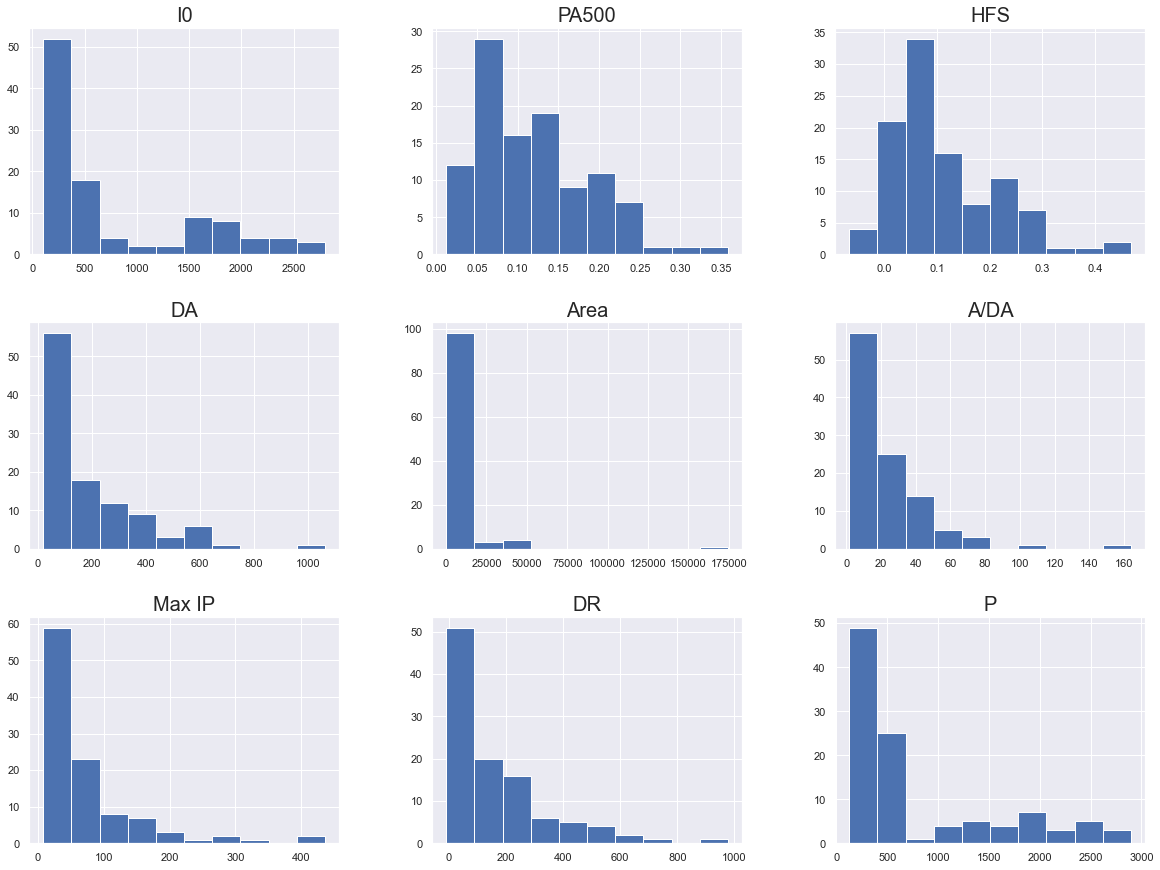

In [19]:
axes=data.hist(figsize=(20,15));
for row in axes:
    for ax in row:
        ax.title.set_size(20)

### Histogramy dla całego zbioru bez outlierów

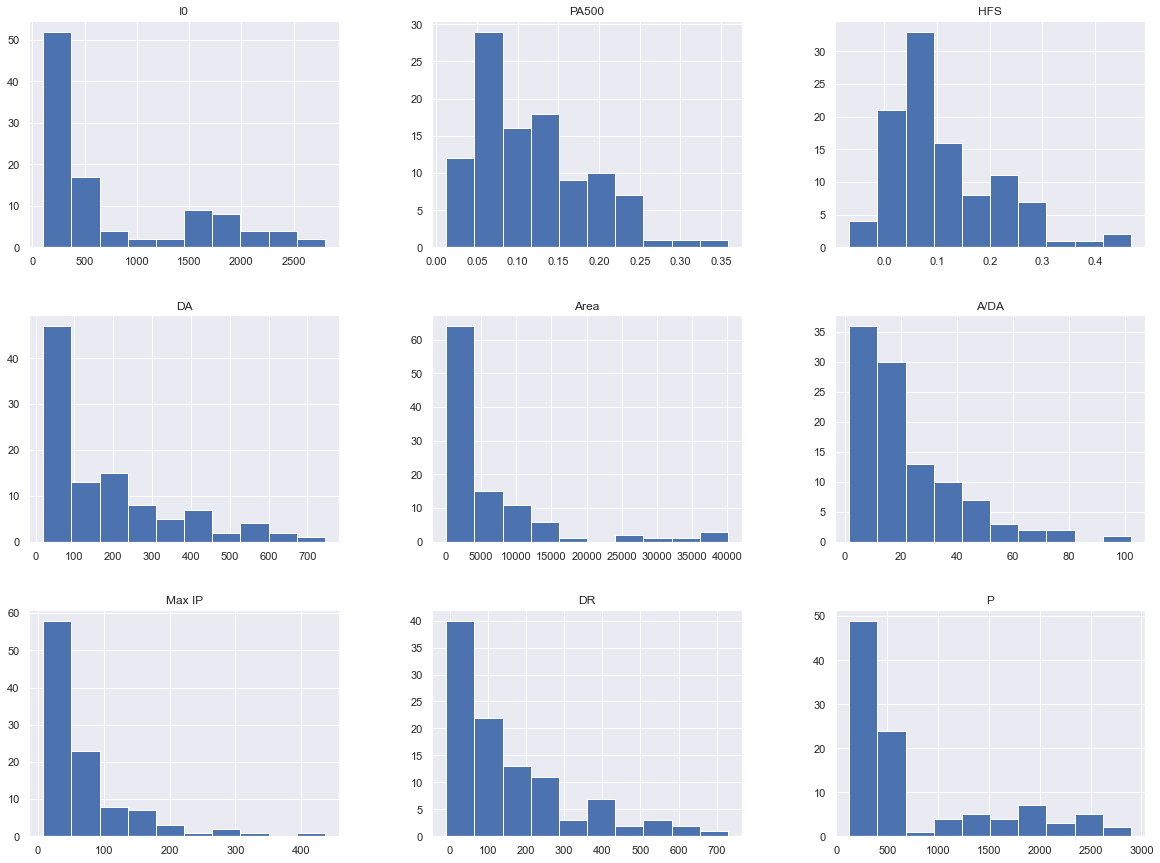

In [20]:
data2.hist(figsize=(20,15));

### Histogramy dla klasy adi z outlierami

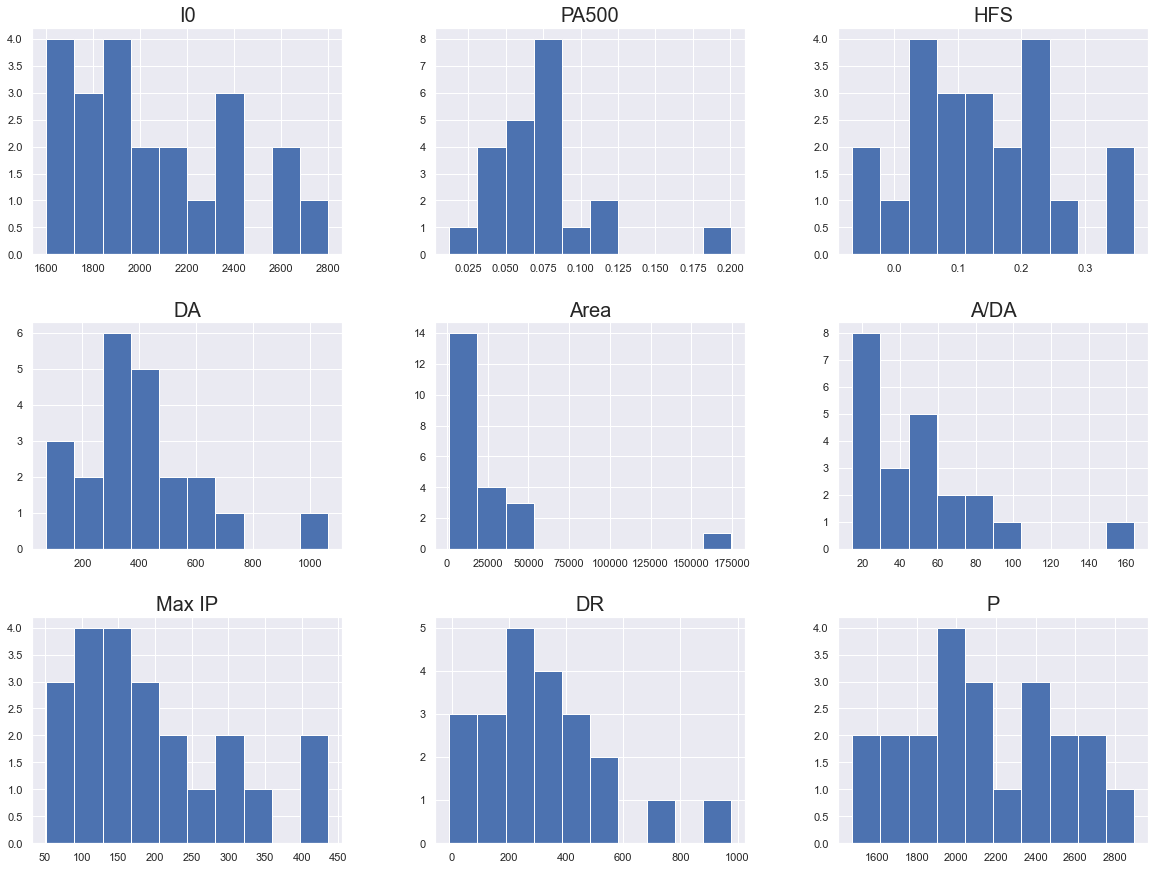

In [21]:
axes=data[data["Class"]=="adi"].hist(figsize=(20,15));
for row in axes:
    for ax in row:
        ax.title.set_size(20)

### Histogramy dla klasy adi bez outlierów

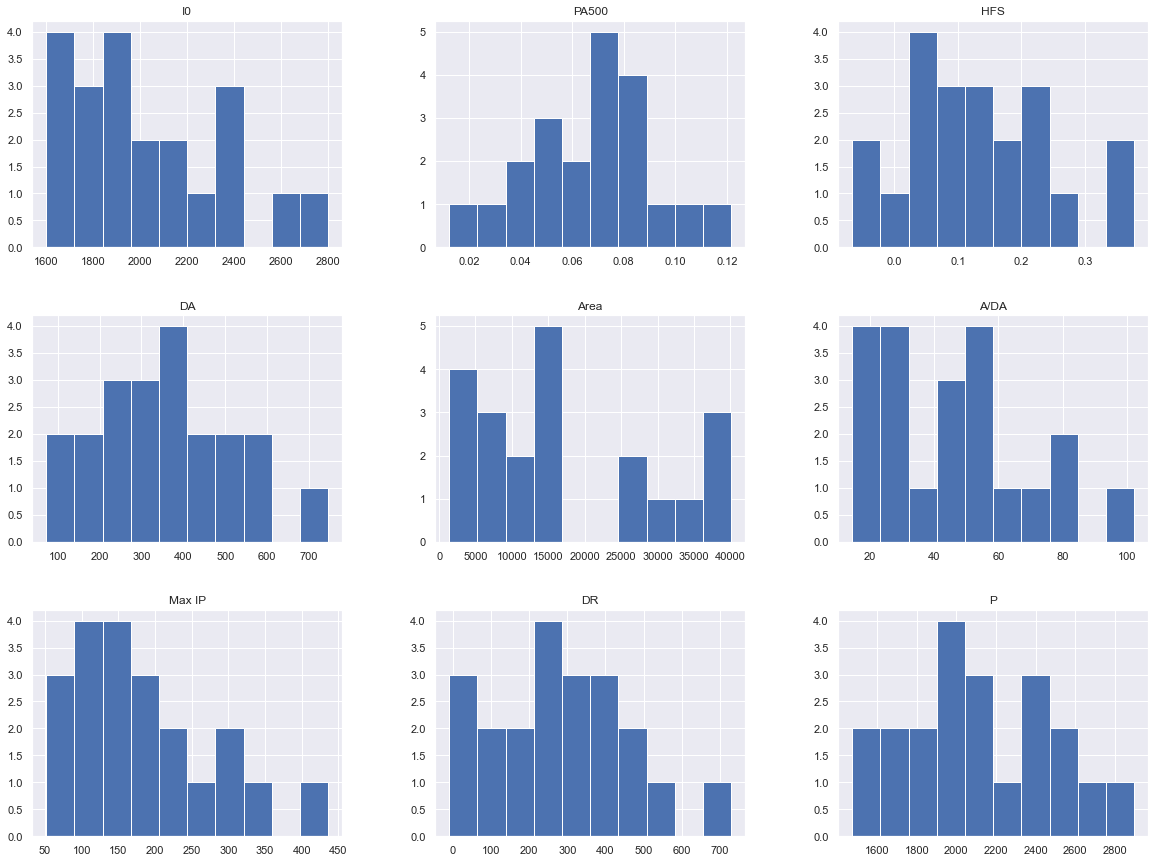

In [22]:
data2[data2["Class"]=="adi"].hist(figsize=(20,15));

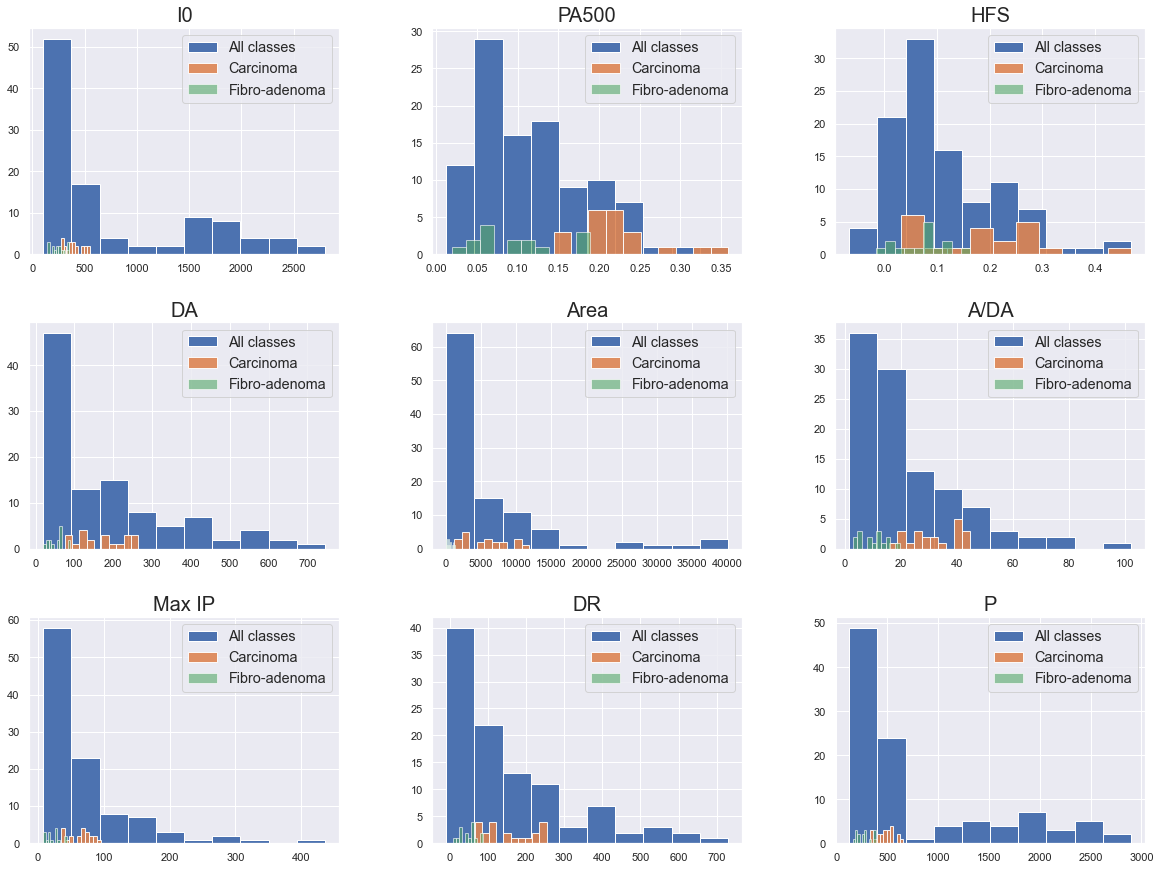

In [23]:
axes = data2.hist(figsize=(20,15), label="All classes");
data2[data2["Class"]=="car"].hist(ax=axes, label="Carcinoma", alpha=0.9);
data2[data2["Class"]=="fad"].hist(ax=axes, label="Fibro-adenoma", alpha=0.6);
for row in axes:
    for ax in row:
        ax.legend(fontsize="x-large")
        ax.title.set_size(20)

## Zakresy zmienności cech

Przed usunięciem outlierów

In [24]:
data.iloc[:,1:].agg(func=[np.min, np.max]).round(4)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
amin,103.0,0.0124,-0.0663,19.6477,70.4262,1.5957,7.9688,-9.2577,124.9786
amax,2800.0,0.3583,0.4677,1063.4414,174480.4762,164.0715,436.0996,977.5524,2896.5825


In [25]:
data.groupby("Class").aggregate(func=[np.min, np.max]).round(4).T

Class                adi         car         con        fad        gla  \
I0     amin    1600.0000    269.4959    649.3694   144.0000   103.0000   
       amax    2800.0000    551.8793   1724.0899   355.0000   502.0000   
PA500  amin       0.0124      0.1442      0.0260     0.0201     0.0581   
       amax       0.2005      0.3583      0.1075     0.1890     0.1658   
HFS    amin      -0.0663      0.0321     -0.0209    -0.0154     0.0112   
       amax       0.3777      0.4677      0.1452     0.1634     0.2918   
DA     amin      72.9311     74.6351    175.0197    19.6477    20.5885   
       amax    1063.4414    264.8049    640.2760    89.5585   150.2240   
Area   amin    1402.2317   1189.5452    304.2707    70.4262    78.2585   
       amax  174480.4762  11888.3918  11852.4851  1370.8381  2657.9104   
A/DA   amin      14.6355     15.9382      1.5957     2.8699     2.7573   
       amax     164.0715     44.8949     43.3871    19.6491    17.6930   
Max IP amin      51.8548     35.6027     23.9757     7.9688    18.2265   
       amax     436.0996     96.5634    143.0922    43.6919    47.5606   
DR     amin      -9.2577     65.5413    143.2578     7.5695     5.7205   
       amax     977.5524    253.7853    632.1651    86.5766   142.4965   
P      amin    1475.3715    329.0906    528.6992   160.3738   124.9786   
       amax    2896.5825    656.7694   1524.6092   385.1335   544.0394   

Class              mas  
I0     amin   121.0000  
       amax   544.6543  
PA500  amin     0.0454  
       amax     0.2323  
HFS    amin     0.0000  
       amax     0.4377  
DA     amin    24.4372  
       amax   157.8842  
Area   amin   144.4665  
       amax  5305.1232  
A/DA   amin     3.1611  
       amax    33.6014  
Max IP amin     9.1022  
       amax    49.3279  
DR     amin    10.5947  
       amax   150.9169  
P      amin   141.7662  
       amax   553.3582

Po usunięciu outlierów

In [26]:
data2.iloc[:,1:].agg(func=[np.min, np.max]).round(4)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
amin,103.0,0.0124,-0.0663,19.6477,70.4262,1.5957,7.9688,-9.2577,124.9786
amax,2800.0,0.3583,0.4677,745.4744,40087.9210,102.2030,436.0996,729.3684,2896.5825


In [27]:
data2.groupby("Class").aggregate(func=[np.min, np.max]).round(4).T

Class               adi         car         con        fad       gla  \
I0     amin   1600.0000    269.4959    649.3694   144.0000  103.0000   
       amax   2800.0000    551.8793   1724.0899   355.0000  502.0000   
PA500  amin      0.0124      0.1442      0.0260     0.0201    0.0581   
       amax      0.1216      0.3583      0.1075     0.1890    0.1658   
HFS    amin     -0.0663      0.0321     -0.0209    -0.0154    0.0112   
       amax      0.3777      0.4677      0.1452     0.1634    0.2918   
DA     amin     72.9311     74.6351    175.0197    19.6477   20.5885   
       amax    745.4744    264.8049    640.2760    89.5585   53.5996   
Area   amin   1402.2317   1189.5452    304.2707    70.4262   78.2585   
       amax  40087.9210  11888.3918  11852.4851  1370.8381  834.2727   
A/DA   amin     14.6355     15.9382      1.5957     2.8699    2.7573   
       amax    102.2030     44.8949     43.3871    19.6491   15.6702   
Max IP amin     51.8548     35.6027     23.9757     7.9688   18.2265   
       amax    436.0996     96.5634    143.0922    43.6919   33.3311   
DR     amin     -9.2577     65.5413    143.2578     7.5695    5.7205   
       amax    729.3684    253.7853    632.1651    86.5766   48.5130   
P      amin   1475.3715    329.0906    528.6992   160.3738  124.9786   
       amax   2896.5825    656.7694   1524.6092   385.1335  544.0394   

Class              mas  
I0     amin   121.0000  
       amax   544.6543  
PA500  amin     0.0454  
       amax     0.2323  
HFS    amin     0.0000  
       amax     0.4377  
DA     amin    24.4372  
       amax   157.8842  
Area   amin   144.4665  
       amax  5305.1232  
A/DA   amin     3.1611  
       amax    33.6014  
Max IP amin     9.1022  
       amax    49.3279  
DR     amin    10.5947  
       amax   150.9169  
P      amin   141.7662  
       amax   553.3582

### Podział zbioru na dane uczące i wektor pożądanych odpowiedzi sieci

In [28]:
data2_y = data2["Class"] #pozadane odpowiedzi
data2_X = data2.iloc[:,1:] #dane uczace

In [29]:
data2_y

Case #
1      car
2      car
3      car
4      car
5      car
      ... 
101    adi
102    adi
104    adi
105    adi
106    adi
Name: Class, Length: 104, dtype: object

### Normalizacja typu min-max

In [30]:
data2_X_normalized = (data2_X - data2_X.min())/(data2_X.max() - data2_X.min())
data2_X_normalized

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,
1,0.156394,0.506054,0.184314,0.288158,0.169255,0.281441,0.122010,0.311382,0.155812
2,0.084168,0.620081,0.620915,0.139850,0.077287,0.243655,0.144228,0.146681,0.099310
3,0.166437,0.636226,0.243137,0.337763,0.295320,0.430378,0.163092,0.356125,0.191871
4,0.102707,0.660444,0.660131,0.162563,0.133235,0.374255,0.188703,0.154958,0.133036
5,0.096341,0.544400,0.581699,0.145028,0.080466,0.245970,0.143462,0.153155,0.108175
...,...,...,...,...,...,...,...,...,...
101,0.703374,0.158426,0.356863,0.427959,0.382599,0.447038,0.376589,0.396543,0.699268
102,0.703374,0.273461,0.321569,0.689662,1.000000,0.750079,0.458088,0.660381,0.708496
104,0.555061,0.172048,0.000000,0.574925,0.314485,0.272024,0.223679,0.597579,0.487224


### Mapowanie klas tkanek na liczby

In [31]:
classes_dict = {"car":1, "fad":2, "mas":3, "gla":4, "con":5, "adi":6}
data2_y = data2_y.replace(classes_dict)
data2_y

Case #
1      1
2      1
3      1
4      1
5      1
      ..
101    6
102    6
104    6
105    6
106    6
Name: Class, Length: 104, dtype: int64

### Dobór odpowiedniej funkcji straty do problemu - porównanie MSE i Cross-Entropy

In [32]:
def mse(y, d) -> float:
    """
    Funkcja błędu średniokwadratowego
    y - predykcja wartości
    d - wartość rzeczywista
    """
    assert y.shape[0] == d.shape[0], f"Dimensions of y and d doesn't match. Got y.shape[0]={y.shape[0]} and d.shape[0]={d.shape[0]}"
    
    return np.mean(np.power(y-d, 2))

In [33]:
y = np.array([0.5, 0.3, 0.2])
d = np.array([1, 0, 0])
mse(y, d)

0.12666666666666668

In [34]:
def cross_entropy_loss(y: ndarray, d: float, eps: float = 1e-9) -> float:
    return -d * np.log(y + eps) - (1-d) * np.log(1-y + eps)

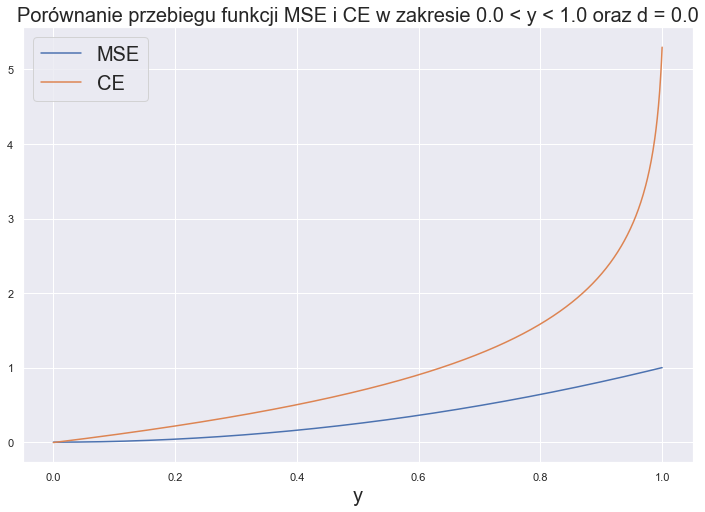

In [35]:
n = np.linspace(0,1,1000)
d = 0.0
f, ax = plt.subplots(figsize=(12,8))
ax.plot(n, np.power(n-d, 2), label="MSE")
ax.plot(n, cross_entropy_loss(n, d, eps=0.005), label="CE")
ax.set_title("Porównanie przebiegu funkcji MSE i CE w zakresie 0.0 < y < 1.0 oraz d = 0.0", fontdict={"size":20})
ax.set_xlabel("y", fontdict={"size":20})
ax.legend(fontsize=20);

### Porównanie fukcji aktywacji sigmoid i tanh

In [36]:
def sigmoid(x: ndarray, beta: float = 1.0) -> ndarray:
    return 1/(1+np.exp(-beta*x))

def tanh(x: ndarray, beta: float = 1.0) -> ndarray:
    x_beta = beta * x
    return (np.exp(x_beta) - np.exp(-x_beta))/(np.exp(x_beta) + np.exp(-x_beta))

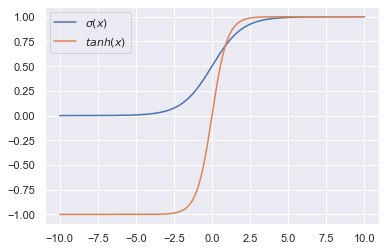

In [37]:
x = np.linspace(-10,10,1000)
plt.plot(x, sigmoid(x,1), label=r"$\sigma(x)$")
plt.plot(x, tanh(x,1), label=r"$tanh(x)$")
plt.legend();

In [38]:
def sigmoid_1st_deriv(x: ndarray, beta: float = 1.0):
    return beta * sigmoid(x, beta) * (1 - sigmoid(x, beta))

def tanh_1st_deriv(x: ndarray, beta: float = 1.0):
    return beta * (1 + tanh(x, beta)) * (1 - tanh(x, beta))

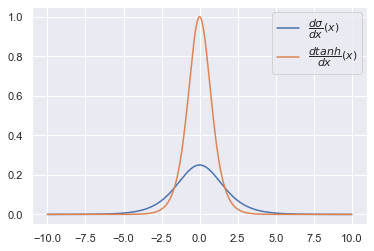

In [39]:
plt.plot(x, sigmoid_1st_deriv(x, 1), label=r"$\dfrac{d\sigma}{dx}(x)$")
plt.plot(x, tanh_1st_deriv(x, 1), label=r"$\dfrac{dtanh}{dx}(x)$")
plt.legend();

# Implementacja sieci

Inicjalizacja RNG

In [40]:
seed = 30042022
np.random.seed(seed)

### Funkcja sprawdzająca czy wymiary danych są jednakowe

In [41]:
class ArrayShapeError(ValueError):
    pass


def check_same_shape(x1: ndarray, x2: ndarray):
    if x1.shape != x2.shape:
        raise ArrayShapeError(f"Arrays must have the same shape, got: x1.shape={x1.shape} x2.shape={x2.shape}")


## Klasa bazowa dla operacji matematycznej

In [42]:
class Operation:
    """
    Abstrakcyjna klasa bazowa reprezentująca pojedynczą operację
     wykonywaną w sieci neuronowej (np. sigmoid, tanh, mnożenie przez wagi itp.).
    """
    def __init__(self):
        self.X = None
        self.output = None
        self.X_grad = None

    def calc_output(self):
        """
        Obliczenie wyjścia operacji.
        :return:
        """
        raise NotImplementedError("Method need to be implemented in a child class")

    def forward(self, X):
        """
        Krok w przód.
        :param x: Dane wejściowe operacji.
        :return: Wynik działania operacji.
        """
        self.X = X
        self.output = self.calc_output()

        return self.output

    def calc_X_grad(self, output_grad):
        """
        Obliczenie gradientu funkcji straty względem danych wejściowych operacji.
        :param output_grad: Gradient funkcji straty względem wyjścia operacji (propagujący wtecz).
        :return:
        """
        raise NotImplementedError("Method need to be implemented in a child class")

    def backward(self, output_grad):
        """
        Krok w tył w propagacji wstecz.
        :param output_grad: Gradient funkcji straty względem wyjścia operacji (propagujący wtecz).
        :return:
        """

        # Sprawdzenie czy otrzymany z kolejnej operacji gradient ma wymiary zgodne z wyjściem
        # bieżącej operacji.
        check_same_shape(self.output, output_grad)

        self.X_grad = self.calc_X_grad(output_grad)

        # Sprawdzenie czy wymiary macierzy gradientu są zgodne z macierzą danych, do których się odnosi.
        check_same_shape(self.X, self.X_grad)

        return self.X_grad



### Operacja mnożenia macierzy

In [43]:
class WeightsMultiplication(Operation):
    """
    Klasa reprezentująca operację mnożenia danych przez wagi połączeń.
    """
    def __init__(self, W):
        super().__init__()
        self.W = W
        self.W_grad = None


    def calc_output(self):
        """
        Obliczenie wyniku mnożenia macierzy danych wejściowych przez wagi połączeń.
        :return:
        """
        if self.X.shape[1] != self.W.shape[0]:
            raise ArrayShapeError("Number of columns in x must be the"
                                  " same as the number of rows in w,"
                                  f" got: x.shape[1]={self.X.shape[1]} and w.shape[0]={self.W.shape[0]}")

        return self.X @ self.W


    def calc_X_grad(self, output_grad):
        """
       Obliczenie gradientu funkcji straty względem danych wejściowych x warstwy w operacji mnożenia macierzy.
       :param output_grad: Gradient funkcji straty względem wyjścia operacji (propagujący wtecz).
       :return:
       """
        return output_grad @ self.W.T

    def calc_W_grad(self, output_grad):
        """
        Obliczenie gradientu funkcji straty względem wag połączęń W w operacji mnożenia macierzy.
        :param output_grad: Gradient funkcji straty względem wyjścia operacji (propagujący wtecz).
        :return:
        """
        return self.X.T @ output_grad

    def backward(self, output_grad):
        """
        Krok w tył w propagacji wstecz.
        :param output_grad: Gradient funkcji straty względem wyjścia operacji (propagujący wtecz).
        :return:
        """

        # Sprawdzenie czy otrzymany z kolejnej operacji gradient ma wymiary zgodne z wyjściem
        # bieżącej operacji.
        check_same_shape(self.output, output_grad)

        self.X_grad = self.calc_X_grad(output_grad)
        self.W_grad = self.calc_W_grad(output_grad)

        # Sprawdzenie czy wymiary gradientów są zgodne z macierzą danych, do których się odnoszą.
        check_same_shape(self.X, self.X_grad)
        check_same_shape(self.W, self.W_grad)

        return self.X_grad, self.W_grad

### Operacja dodawania polaryzacji neuronu

In [44]:
class AddBias(Operation):
    """
    Klasa reprezentująca operację dodawania polaryzacji
     do wyniku mnożenia danych przez wagi połączeń.
    """
    def __init__(self, B):
        """
        Inicjalizacja obiektu klasy AddBias.
        :param B:
        """
        super().__init__()
        self.B = B

    def calc_output(self):
        """
        Dodanie polaryzacji do kombinacji liniowej neuronów.
        :return:
        """
        return self.X + self.B

    def calc_X_grad(self, output_grad):
        """
        Obliczenie gradientu funkcji straty względem danych wejściowych operacji dodawania polaryzacji.
        :param output_grad: Gradient funkcji straty względem wyjścia operacji (propagujący wtecz).
        :return:
        """
        return np.ones_like(self.B) * output_grad

    def calc_B_grad(self, output_grad):
        """
        Obliczenie gradientu funkcji straty względem wartości polaryzacji w operacji dodawania polaryzacji.
        :param output_grad: Gradient funkcji straty względem wyjścia operacji (propagujący wtecz).
        :return:
        """
        return (np.ones_like(self.output) * output_grad).sum(axis=0).reshape(1,-1)

    def backward(self, output_grad):
        """
        Krok w tył w propagacji wstecz.
        :param output_grad: Gradient funkcji straty względem wyjścia operacji (propagujący wtecz).
        :return:
        """

        # Sprawdzenie czy otrzymany z kolejnej operacji gradient ma wymiary zgodne z wyjściem
        # bieżącej operacji.
        check_same_shape(self.output, output_grad)

        self.X_grad = self.calc_X_grad(output_grad)
        self.B_grad = self.calc_B_grad(output_grad)

        # Sprawdzenie czy wymiary gradientów są zgodne z macierzą danych, do których się odnoszą.
        check_same_shape(self.X, self.X_grad)
        check_same_shape(self.B, self.B_grad)

        return self.X_grad, self.B_grad

### Funkcja Tanh jako klasa przesyłająca dane do przodu sieci oraz gradient wstecz.

In [45]:
class Tanh(Operation):
    """
    Klasa reprezentująca funkcję aktywacji tangens hiperboliczny.
    """
    def __init__(self, beta=1.0):
        """
        Inicjalizacja obiektu klasy Tanh.
        :param beta: parametr nachylenia funkcji tangens hiperboliczny
        """
        super().__init__()
        self.beta = beta

    def calc_output(self):
        """
        Zastosowanie funkcji tangens hiperboliczny do danych.
        :return: wynik zastosowania funkcji tangens hiperboliczny do danych
        """
        return np.tanh(self.X * self.beta)

    def calc_X_grad(self, output_grad):
        """
        Obliczenie gradientu funkcji straty względem danych
         wejściowych funkcji tangens hiperboliczny.
        :param output_grad: gradient funkcji straty podany z następnej operacji
        :return: gradient funkcji straty względem danych
         wejściowych funkcji tangens hiperboliczny
        """
        grad = self.beta * (1 + self.output) * (1 - self.output)
        return grad * output_grad

### Klasa reprezentująca warstwę ukrytą sieci neuronowej złożoną z kolejnych operacji matematycznych

In [46]:
class Layer:
    """
    Klasa reprezentująca warstwę sieci neuronowej.
    """
    def __init__(self, n_neurons, activation):
        self.operations = []
        self.n_neurons = n_neurons
        self.activation = activation
        self.new = True
        self.grads = {}

    def initialize_layer(self, X):
        """
        Do inicjalizacji wag połączeń W oraz wartości polaryzacji B wymagane jest podanie macierzy danych X
         (na jej podstawie wnioskowane są wymiary macierzy wag i wektora polaryzacji).
        :param X: macierz danych wejściowych
        :return: None
        """
        weightsMultiplication = WeightsMultiplication(np.random.randn(X.shape[1], self.n_neurons))
        addBiases = AddBias(np.zeros((1, self.n_neurons)))
        self.operations = [weightsMultiplication, addBiases, self.activation]

    def forward(self, X):
        """
        Obliczenie wyjścia warstwy.
        :param X: dane na wejściu warstwy
        :return: wyście warstwy
        """
        if self.new:
            self.initialize_layer(X)
            self.new = False

        self.X = X
        output = X
        for operation in self.operations:
            output = operation.forward(output)

        self.output = output

        return self.output

    def backward(self, output_grad):
        """
        Krok w tył w propagacji wstecz gradientu funkcji straty.
        :param output_grad: gradient funkcji straty podany z następnej warstwy sieci
        :return: gradient funkcji straty względem danych wejściowych warstwy
        """
        X_grad = output_grad

        for operation in reversed(self.operations[2:]):
            X_grad = operation.backward(X_grad)


        X_grad, B_grad = self.operations[1].backward(X_grad)
        X_grad, W_grad = self.operations[0].backward(X_grad)

        self.grads['X'] = X_grad
        self.grads['W'] = W_grad
        self.grads['B'] = B_grad

        return self.grads['X']



### Klasa reprezentująca warstwę wyjściową sieci z funkcją straty CE (entropii krzyżowej) wraz z funkcją softmax

In [47]:
def softmax1D(x):
    return np.exp(x) / (np.exp(x)).sum()


def softmax(X, axis = 1):
    return np.apply_along_axis(softmax1D, axis, X)


class OutputCrossEntropy:
    """
    Warstwa wyjściowa sieci wraz funkcją softmax oraz funkcją straty entropii krzyżowej.
    """
    def __init__(self, eps=1e-7):
        """
        Inicjalizacja obiekut klasy CrossEntropy.
        :param eps: wartość ograniczająca zakres wartości predykcji do (eps; 1.0-eps) w celu zapobiegnięciu wystąpieniu
         ekstremalnie małych (bliskich 0.0) wartości w argumencie logarytmu
        """
        self.eps = eps

    def predict(self, v):
        """
        Wyznaczenie prawdopodobieństw przynależności danej obserwacji do poszczególnych
        klas z wykorzystaniem funkcji softmax.
        :param v: wyjście ostatniej warstwy ukrytej sieci
        :return: predykcje przynależności obserwacji do danej klasy w postaci wektora prawdopodobieństw
        """
        # np.clip ogranicza wartości zwracane przez funkcję softmax, aby zapobiec występowaniu wartości ekstremalnie
        # bliskich 0.0 lub 1.0 (na potrzeby późniejszego użycia w log(y) lub log(1-y))
        return np.clip(softmax(v), self.eps, 1.0-self.eps)

    def forward(self, v, d):
        """
        Zastosowanie funkcji softmax do predykcji sieci + wyliczenie wartości funkcji straty.
        Wartość funkcji etropii krzyżowej obliczana jest oddzielnie dla każdej możliwej klasy danych.
        Wyniki te są sumowane dla każdej z obserwacji (dla każdego rzędu macierzy danych),
        a następnie wyciągana jest średnia wartość tej sumy.
        (Pozwala to uniezależnić wartość
        funkcji straty od liczebności jednocześnie przetwarzanych obserwacji).
        :param v: wyjście ostatniej warstwy ukrytej sieci
        :param d: pożądane wyjście sieci
        :return: średnia wartość funkcji straty dla wprowadzonej macierzy danych
        """
        self.y = self.predict(v)
        self.d = d

        check_same_shape(self.y, self.d)

        # Najpierw suma w każdym rzędzie (czyli dla każdej obserwacji), następnie średnia z tych sum.
        self.loss = (-self.d * np.log(self.y) - (1.0 - self.d) * np.log(1-self.y)).sum(axis=1).mean()

        return self.loss


    def backward(self):
        """
        Obliczenie gradientu funkcji straty względem predykcji sieci (przed zastosowaniem softmaxu).
        :return:
        """
        return self.y - self.d

### Klasa sieci neuronowej składającej się warstw

In [48]:
class Sigmoid(Operation):
    """
    Klasa reprezentująca funkcję aktywacji sigmoid (unipolarną).
    """
    def calc_output(self):
        return 1.0 / (1.0 - np.exp(self.X))

    def calc_X_grad(self, output_grad):
        return self.output * (1.0 - self.output)


### Kodowanie klas danych

In [49]:
def one_hot_encode(y):
    """
    Kodowanie klas zbioru danych.
    Na przykład dla 3 możliwych klas:
    1 -> [1 0 0]
    2 -> [0 1 0]
    3 -> [0 0 1]
    :param y: klasy (etykiety) danych
    :return:
    """
    n_classes = np.unique(y).size
    y_encoded = np.zeros((y.size, n_classes))
    for i in range(y.size):
        y_encoded[i, y[i]-1] = 1

    return y_encoded

In [50]:
X = data2_X_normalized.to_numpy() # konwersja z DataFrame na array
y = one_hot_encode(data2_y.array)

In [51]:
def expspace(start, stop, n_epochs):
    decay_coeff = (stop / start) ** (1 / n_epochs)
    res = np.zeros(n_epochs)
    res[0] = start
    for i in range(1, n_epochs):
        res[i] = res[i-1] * decay_coeff
    return res

In [52]:
plt.rc('axes', labelsize=16, titlesize=20)
plt.rc('legend', fontsize=12)

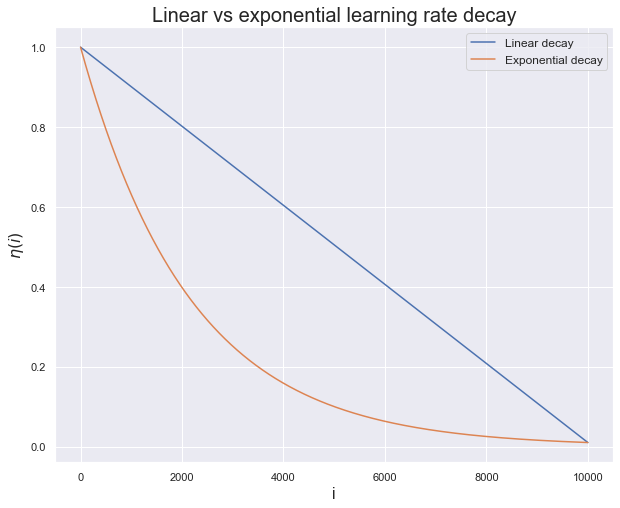

In [53]:
a = 10000
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,a), np.linspace(1,0.01,a),)
plt.plot(np.arange(0, a), expspace(1,0.01,a))
plt.xlabel("i")
plt.ylabel(r"$\eta(i)$")
plt.title("Linear vs exponential learning rate decay")
plt.legend(["Linear decay", "Exponential decay"]);

In [157]:
class NeuralNetwork:
    """
    Klasa reprezetująca sieć neuronową. Zaimplementowano mechanizm liniowego spadku
    wartości współczynnika uczenia się wraz z kolejnymi iteracjami (epokami),
    a także mechanizm uczenia się z bezwładnością.
    """
    def __init__(self, layers, output_layer, start_learning_rate=0.1, stop_learning_rate=None, momentum=0.9, learning_rate_decay_type='linear'):
        """
        Inicjalizacja sieci neuronowej.
        :param layers: warstwy z jakich składa się sieć neuronowa (instancje klasy Layer)
        :param output_layer: warstwa wyjściowa z funkcją straty służącą do pomiaru jakości
        predykcji sieci
        :param start_learning_rate: początkowy współczynnik uczenia się sieci
        :param stop_learning_rate: finalny współczynnik uczenia się sieci, jeśli jest None
        to współczynnik uczenia się sieci będzie stały i równy start_learning rate
        :param momentum: współczynnik bezwładności sieci
        :param learning_rate_decay_type: rodzaj spadku współczynnika uczenia się sieci (liniowy lub wykładniczy)
        """
        self.layers = layers
        self.output_layer = output_layer
        self.start_learning_rate = start_learning_rate
        self.stop_learning_rate = stop_learning_rate
        self.momentum = momentum
        self.new_forward = True
        self.new_backward = True
        if learning_rate_decay_type == 'linear':
            self.lr_decay_function = np.linspace
        elif learning_rate_decay_type == 'exponential':
            self.lr_decay_function = expspace
        else:
            raise ValueError(f"Invalid learning_rate_decay_type value. Valid values are: 'linear', 'exponential', got: {learning_rate_decay_type}")

        if self.stop_learning_rate is not None:
            if stop_learning_rate > start_learning_rate:
                raise ValueError(f"stop_learning_rate must be lower than start_learning_rate, got: start_learning_rate={start_learning_rate} < stop_learning_rate={stop_learning_rate}")

    def forward(self, X, d):
        """
        Przepuszczenie danych wejściowych X przez sieć "w przód".
        :param X: macierz danych wejściowych
        :param d: pożądane wyjścia sieci
        :return: wyliczona wartość funkcji straty dla wprowadzonych danych
        """
        self.X = X  #zapamietanie wejscia sieci
        self.d = d #zapamietanie pożądanego wyjścia sieci

        if self.new_forward:
            # inicjalizacja każdej z warstw w sieci
            for layer in self.layers:
                layer.initialize_layer(X)
            self.new_forward = False

        v = X

        for layer in self.layers:
            v = layer.forward(v)

        self.loss = self.output_layer.forward(v, self.d) # obliczenie wartości funkcji straty
        self.y = self.output_layer.y # zapamietanie predykcji sieci

        return self.loss

    def backward(self):
        """
        Propagacja gradientu funkcji straty wstecz wzdłuż warstw
        sieci wraz z modyfikacją parametrów sieci zgodną z SGD.
        :return: None
        """
        grad = self.output_layer.backward()

        for layer in reversed(self.layers):
            grad = layer.backward(grad)

            if self.new_backward:
                # jeśli pierwsza iteracja to pomiń bezwładność
                layer.operations[0].W -= self.learning_rate * layer.grads['W']
                layer.operations[1].B -= self.learning_rate * layer.grads['B']

            else:
                layer.operations[0].W -=  (self.learning_rate * (1.0 - self.momentum) * layer.grads['W'] +
                                           self.momentum * (layer.operations[0].W - layer.operations[0].W_prev))

                layer.operations[1].B -=  (self.learning_rate *(1.0 - self.momentum) * layer.grads['B'] +
                                          self.momentum * (layer.operations[1].B - layer.operations[1].B_prev))

            layer.operations[0].W_prev = np.copy(layer.operations[0].W)
            layer.operations[1].B_prev = np.copy(layer.operations[1].B)

        if self.new_backward:
            self.new_backward = False


    def predict(self, X):
        """
        Obliczenie predykcji sieci.
        :param X: dane wejściowe, które chcemy sklasyfikować
        :return: predykcje sieci dla danych X
        """
        v = X
        for layer in self.layers:
            v = layer.forward(v)

        y = self.output_layer.predict(v)

        return y

    def test(self, X_test, y_test):
        """
        Obliczenie odsetka prawidłowej klasyfikacji danych wejściowych.
        :param X_test: dane wejściowe, które podlegać będą klasyfikacji
        :param y_test: pożądane wyjście sieci
        :return: odsetek prawidłowej klasyfikacji danych wejściowych.
        """
        predicts = self.predict(X_test)
        score = np.equal(np.argmax(predicts, axis=1), np.argmax(y_test, axis=1)).sum() / y_test.shape[0]
        return score

    def train(self, X_train, y_train, X_test, y_test, epochs, batch_size, eval_every=10):
        """
        Uczenie się sieci na podstawie danych treningowych.
        :param X_train: zbiór danych wejściowych treningowych
        :param y_train: pożądane wyjścia sieci dla zbioru treningowego
        :param X_test: zbiór danych wejściowych testowych
        :param y_test: pożądane wyjścia sieci dla zbioru testowego
        :param epochs: liczba epok sieci (zadana liczba przejść przez cały zbiór danych treningowych)
        :param batch_size: wielkość porcji danych treningowych podawanej na wejście sieci (liczba wierszy macierzy danych wejściowych)
        :param eval_every: co ile epok sieć będzie testowana pod kątem trafności predykcji
        :return:
        """
        self.epochs = epochs + 1
        self.eval_every = eval_every
        self.train_loss_history = np.zeros(self.epochs)
        self.test_loss_history = np.zeros(self.epochs//eval_every + 1)

        if self.stop_learning_rate is not None:
            # Obliczenie wartości współczynnika uczenia się w każdej iteracji, z liniowym lub wykładniczym spadkiem
            self.learning_rates = self.lr_decay_function(self.start_learning_rate, self.stop_learning_rate, self.epochs)
        else:
            self.learning_rates = np.ones(self.epochs) * self.start_learning_rate

        for epoch in range(self.epochs):
            self.learning_rate = self.learning_rates[epoch]

            for X_batch, y_batch in self.create_batch(X_train, y_train, batch_size):
                self.forward(X_batch, y_batch)
                self.backward()

            self.train_loss_history[epoch] = self.loss

            if epoch % eval_every == 0:
                self.forward(X_test, y_test)
                self.test_loss_history[epoch // eval_every] = self.loss
                print(f"Score after {epoch} epoch: {self.test(X_test, y_test):.2%}")


    def create_batch(self, X, y, batch_size):
        """
        Generator.
        Podział danych na porcje i wymieszanie (permutacja) danych.
        :param X: macierz cech wejściowych
        :param y: pożądana odpowiedź sieci
        :param batch_size: wielkość porcji
        :return:
        """
        permutation_sequence = np.random.permutation(X.shape[0])
        # wymieszanie danych (wektorów obserwacji)
        X = X[permutation_sequence, :]
        y = y[permutation_sequence, :]

        for batch_start in range(0, X.shape[0]-batch_size, batch_size):
            X_batch = X[batch_start:batch_start+batch_size, :]
            y_batch = y[batch_start:batch_start+batch_size, :]

            yield X_batch,  y_batch


    def plot_errors(self):
        """
        Rysowanie przebiegów funkcji błędu dla danych treningowych i dla danych testowych.
        :return:
        """
        plt.figure(figsize=(15,10))
        plt.plot(np.arange(0, self.epochs), self.train_loss_history, 'r-')
        plt.plot(np.arange(0, self.epochs, self.eval_every), self.test_loss_history, 'g-')
        plt.legend(["Przebieg błędu na danych treningowych", "Przebieg błędu na danych testowych"])
        plt.title("Przebieg błędu w funkcji epok")
        plt.xlabel("Epoka")
        plt.ylabel("Wartość funkcji błędu");


In [158]:
from sklearn.model_selection import train_test_split

### Podział na zbiór treningowy i testowy z zachowaniem proporcji udziału poszczególnych klas w zbiorze danych

In [56]:
# Podział zbioru danych na zbiór treningowy i testowy z zachowaniem proporcji udziału klas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=data2_y, random_state=seed)

### Utworzenie obiektu sieci neuronowej i trening

In [57]:
class Linear(Operation):

    def calc_output(self):
        return self.X

    def calc_X_grad(self, output_grad):
        return output_grad

In [282]:
# Utworzenie obiektu sieci neuronowej złożonej z 1 warstwy ukrytej
NN = NeuralNetwork(layers=[Layer(n_neurons=9, activation=Tanh()),
                           Layer(n_neurons=6, activation=Linear())],
                   output_layer=OutputCrossEntropy(),
                   start_learning_rate=0.05,
                   stop_learning_rate=0.005,
                   momentum=0.9,
                   learning_rate_decay_type='exponential')

n_epochs = 1000
eval_every = 100
NN.train(X_train, y_train, X_test, y_test, n_epochs, 50, eval_every)

Score after 0 epoch: 15.38%
Score after 100 epoch: 65.38%
Score after 200 epoch: 69.23%
Score after 300 epoch: 80.77%
Score after 400 epoch: 80.77%
Score after 500 epoch: 80.77%
Score after 600 epoch: 80.77%
Score after 700 epoch: 80.77%
Score after 800 epoch: 80.77%
Score after 900 epoch: 80.77%
Score after 1000 epoch: 80.77%


#### Wykres przebiegu funkcji błędu

In [268]:
plt.rc('axes', labelsize=16, titlesize=20)
plt.rc('legend', fontsize=12)

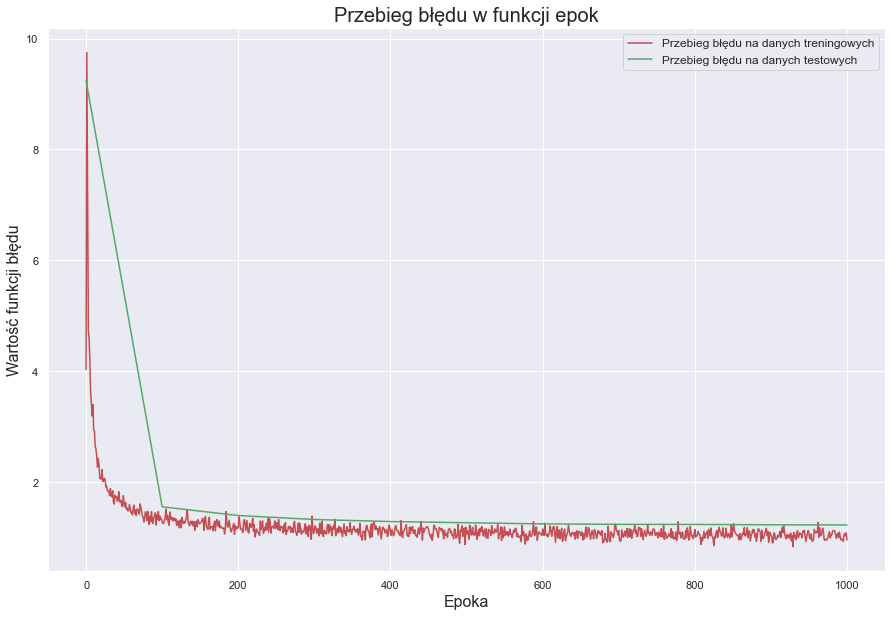

In [283]:
NN.plot_errors()

In [284]:
def make_accuracy_table():
    return pd.DataFrame({"Dokładność": [np.round(NN.test(X_train, y_train), 2), np.round(NN.test(X_test, y_test), 2)]}, index=['Dane treningowe', 'Dane testowe'])

In [285]:
make_accuracy_table()

,Dokładność
Dane treningowe,0.78
Dane testowe,0.81


In [286]:
diagnoses_test = pd.DataFrame({"diagnose": np.argmax(NN.predict(X_test), axis=1) + 1,
                               "real": (np.argmax(y_test, axis=1) + 1)}).replace({v: k for k, v in classes_dict.items()})

diagnoses_train = pd.DataFrame({"diagnose": np.argmax(NN.predict(X_train), axis=1) + 1,
                                "real": (np.argmax(y_train, axis=1) + 1)}).replace({v: k for k, v in classes_dict.items()})

def calc_sensitivity(label):
    true_positive_train = diagnoses_train[(diagnoses_train == label).all(axis=1)].shape[0]
    n_label_train = diagnoses_train[diagnoses_train['real'] == label].shape[0]
    sensitivity_train = true_positive_train / n_label_train

    true_positive_test = diagnoses_test[(diagnoses_test == label).all(axis=1)].shape[0]
    n_label_test = diagnoses_test[diagnoses_test['real'] == label].shape[0]
    sensitivity_test = true_positive_test / n_label_test

    # print(f"Czułość metody diagnozowania dla klasy '{label}' na danych treningowych: {sensitivity_train:.2f}")
    # print(f"Czułość metody diagnozowania dla klasy '{label}' na danych testowych: {sensitivity_test:.2f}")

    return sensitivity_train, sensitivity_test

def calc_specificity(label):

    true_negative_train = diagnoses_train[(diagnoses_train != label).all(axis=1)].shape[0]
    n_nonlabel_train = diagnoses_train[diagnoses_train['real'] != label].shape[0]
    specificity_train = true_negative_train / n_nonlabel_train

    true_negative_test = diagnoses_test[(diagnoses_test != label).all(axis=1)].shape[0]
    n_nonlabel_test = diagnoses_test[diagnoses_test['real'] != label].shape[0]
    specificity_test = true_negative_test / n_nonlabel_test

    # print(f"Specyficzność metody diagnozowania dla klasy '{label}' na danych treningowych: {specificity_train:.2f}")
    # print(f"Specyficzność metody diagnozowania dla klasy '{label}' na danych testowych: {specificity_test:.2f}")

    return specificity_train, specificity_test

def make_sens_spec_table(label):
    sens_train, sens_test = calc_sensitivity(label)
    spec_train, spec_test = calc_specificity(label)
    return pd.DataFrame({"Czułość": [sens_train, sens_test], "Specyficzność": [spec_train, spec_test]}, index=['Dane treningowe', 'Dane testowe'])

def make_sens_spec_multitable():
    labels = ['car', 'adi', 'con', 'gla', 'mas', 'fad']
    data_set = ['Dane treningowe', 'Dane testowe']
    d = {label : {'Czułość': calc_sensitivity(label), 'Specyficzność': calc_specificity(label)} for label in labels}
    reform = {(outerKey, innerKey): values for outerKey, innerDict in d.items() for innerKey, values in innerDict.items()}
    return pd.DataFrame(reform, index=['Dane treningowe', 'Dane testowe']).transpose().round(2)


In [287]:
r = make_sens_spec_multitable()
r

Dane treningowe  Dane testowe
car Czułość                   0.94          0.80
    Specyficzność             0.97          0.95
adi Czułość                   1.00          1.00
    Specyficzność             0.98          1.00
con Czułość                   0.90          1.00
    Specyficzność             1.00          1.00
gla Czułość                   0.73          0.75
    Specyficzność             0.94          0.95
mas Czułość                   0.57          0.50
    Specyficzność             0.91          0.95
fad Czułość                   0.45          0.75
    Specyficzność             0.94          0.91

In [223]:
make_sens_spec_table('adi')

,Czułość,Specyficzność
Dane treningowe,1.0,0.983871
Dane testowe,1.0,1.000000


#### Użyteczność metody diagnostycznej dla klasy 'fad' (gruczolakowłókniak)

In [ ]:
diagnoses_train[diagnoses_train['real'] == 'gla']

,diagnose,real
7,mas,gla
9,gla,gla
19,gla,gla
26,gla,gla
33,gla,gla
39,gla,gla
40,fad,gla
41,gla,gla
58,gla,gla
60,gla,gla


In [72]:
diagnoses_train[diagnoses_train['real'] == 'fad']

,diagnose,real
14,fad,fad
16,mas,fad
27,mas,fad
32,gla,fad
42,fad,fad
49,fad,fad
53,fad,fad
62,gla,fad
66,mas,fad
72,mas,fad
